<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/MineriaDatos/P3_3SeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Transacciones ventas.csv', sep=',', encoding='latin-1')
data.head()

,Sector,Marca,Linea_2,Sublinea_2,Presentacion,Gramaje_2,Empresa,Año,Fecha,Cliente,...,Fecha_2,Year,Quarter,Month,Day,Dia_Num_Sem,Dia_Semana_,IND_Compra,IND_Precio_Sospech_15,IND_PrecioSospech20
0,CARNES FRIAS,MARCA MAY,JAMONES,PECHUGA,PAQUETERIA,0.26,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
1,QUESOS,MARCA TLA,Q-MADURADOS,MANCHEGO,PAQUETERIA,0.40,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
2,QUESOS,MARCA CHIA,Q-FRESCOS,PANELA,PAQUETERIA,0.40,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
3,COMIDAS PREPARADAS,CHEF,POLLO,CONGELADO,PAQUETERIA,0.45,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
4,CARNES FRIAS,MARCA HID,SALCHICHA,SALCHICHA TRADICIONA,PAQUETERIA,0.55,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1


In [ ]:
data["Año"].sort_values().unique()

array([2014, 2015, 2016])

In [ ]:
data["Cantidad"].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  30,
        31,  34,  35,  36,  40,  42,  45,  47,  50,  57,  58,  60,  75,
       130, 140, 165])

In [ ]:
data.Fecha

0        01-01-14
1        01-01-14
2        01-01-14
3        01-01-14
4        01-01-14
           ...   
58898    30-12-16
58899    30-12-16
58900    30-12-16
58901    30-12-16
58902    30-12-16
Name: Fecha, Length: 58903, dtype: object

Voy a usar las fechas en los 3 años

In [ ]:
# Contar las ocurrencias de cada valor en la columna "Sector"
conteo_sector = data['Sector'].value_counts()

# Imprimir los resultados en el formato "string: veces"
for sector, veces in conteo_sector.items():
    print(f'{sector} : {veces}')

CARNES FRIAS : 20807
QUESOS : 17242
YOGHURT : 7094
COMIDAS PREPARADAS : 3677
CREMAS : 2116
OTROS : 2010
RES : 1679
COMIDAS REFRIGERADAS : 1628
BEBIDAS : 904
MNTQUILLAS Y MARGARI : 755
POSTRES : 709
GENERAL : 282


Quiero centrarme en un sector para ver en qué épocas se vende más y también necesito las columnas Cantidad, Precio, Importe

## Sector CREMAS

In [ ]:
# Filtrar los registros con Sector igual a "CREMAS" y seleccionar las columnas deseadas
data_Cremas = data[data['Sector'] == 'CREMAS'][['Fecha', 'Cantidad', 'Precio', 'Importe']]

In [ ]:
data_Cremas.head(5)

,Cantidad,Precio,Importe
Fecha,,,
2014-01-03,1,9.4,9.4
2014-01-03,1,11.5,11.5
2014-01-03,1,11.5,11.5
2014-01-07,1,13.9,13.9
2014-01-07,1,11.5,11.5


In [ ]:
# Las fechas están en el formato "01-01-14", día-mes-año
# Convierte las fechas al formato "2014-01-01"
# Convierte la columna "Fecha" al formato deseado "2014-01-01"
#data_Cremas['Fecha'] = pd.to_datetime(data_Cremas['Fecha'], format="%d-%m-%y").dt.strftime("%Y-%m-%d")
# Asegúrate de que 'Fecha' sea un objeto datetime
data_Cremas['Fecha'] = pd.to_datetime(data_Cremas['Fecha'], format="%d-%m-%y")

data_Cremas

,Fecha,Cantidad,Precio,Importe
19,2014-01-03,1,9.4,9.4
46,2014-01-03,1,11.5,11.5
54,2014-01-03,1,11.5,11.5
83,2014-01-07,1,13.9,13.9
105,2014-01-07,1,11.5,11.5
...,...,...,...,...
58772,2016-12-29,1,18.5,18.5
58776,2016-12-29,2,9.5,19.0
58823,2016-12-30,1,11.0,11.0
58855,2016-12-30,1,9.5,9.5


In [ ]:
data_Cremas["Cantidad"].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  8, 21])

Crear nuevos conjuntos de datos para analizar por Cantidad y por Importe

In [ ]:
# Agrupar por fecha y sumar la cantidad total vendida para cada fecha
data_Cremas_Cantidad = data_Cremas.groupby('Fecha')['Cantidad'].sum().reset_index()

# Agrupar por fecha y sumar el importe total para cada fecha
data_Cremas_Importe = data_Cremas.groupby('Fecha')['Importe'].sum().reset_index()

In [ ]:
data_Cremas_Cantidad.head()

,Fecha,Cantidad
0,2014-01-03,3
1,2014-01-07,8
2,2014-01-08,3
3,2014-01-09,2
4,2014-01-10,7


In [ ]:
data_Cremas_Importe.head()

,Fecha,Importe
0,2014-01-03,32.4
1,2014-01-07,83.9
2,2014-01-08,37.2
3,2014-01-09,27.8
4,2014-01-10,70.8


Es posible que los valores en las columnas "Cantidad" e "Importe" puedan causar valores atípicos (outliers) en los datos de series temporales. Los valores atípicos son observaciones que se desvían significativamente de la mayoría de los otros puntos de datos y pueden afectar negativamente el ajuste de modelos estadísticos, como ARIMA. Aquí hay algunas consideraciones:

*  Valores extremadamente altos: Los valores de "Cantidad" como 21 son significativamente más altos que los valores más comunes (1, 2, 3, etc.). Si estos valores representan ventas inusuales o eventos excepcionales, pueden considerarse valores atípicos y afectarán la media y la varianza de tus datos.

*  Impacto en la estacionalidad: Los valores atípicos también pueden afectar la estacionalidad y los patrones de tendencia en tus datos. Dependiendo de la frecuencia de estos valores inusuales, podrían introducir patrones no deseados en tus series temporales.

*  Afectan la convergencia del modelo: Como mencionaste anteriormente, valores atípicos pueden dificultar la convergencia del modelo ARIMA, ya que el modelo puede tratar de ajustarse a estos valores extremos.

#### Transformación de datos:

Puedes aplicar transformaciones a tus datos, como la transformación logarítmica, para reducir el impacto de los valores atípicos y estabilizar la varianza. Esto puede ayudar a mejorar la convergencia del modelo.

In [ ]:
# Aplicar la transformación logarítmica a la columna "Cantidad"
data_Cremas_Cantidad['Cantidad'] = np.log(data_Cremas_Cantidad['Cantidad'])

# Verificar los primeros registros para confirmar la transformación
print(data_Cremas_Cantidad.head())

       Fecha  Cantidad
0 2014-01-03  1.098612
1 2014-01-07  2.079442
2 2014-01-08  1.098612
3 2014-01-09  0.693147
4 2014-01-10  1.945910


In [ ]:
# Aplicar la transformación logarítmica a la columna "Importe"
data_Cremas_Importe['Importe'] = np.log(data_Cremas_Importe['Importe'])

# Verificar los primeros registros para confirmar la transformación
print(data_Cremas_Importe.head())

       Fecha   Importe
0 2014-01-03  3.478158
1 2014-01-07  4.429626
2 2014-01-08  3.616309
3 2014-01-09  3.325036
4 2014-01-10  4.259859


#### División train-test

In [ ]:
# Fechas de inicio y fin para los conjuntos de entrenamiento y prueba
fecha_inicio_entrenamiento = '2014-01-01'
fecha_fin_entrenamiento = '2015-12-31'
fecha_inicio_prueba = '2016-01-01'
fecha_fin_prueba = '2016-12-31'

# Filtra los datos para obtener conjuntos de entrenamiento y prueba
train_Cantidad = data_Cremas_Cantidad[(data_Cremas_Cantidad['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_Cantidad['Fecha'] <= fecha_fin_entrenamiento)]['Cantidad']
test_Cantidad = data_Cremas_Cantidad[(data_Cremas_Cantidad['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_Cantidad['Fecha'] <= fecha_fin_prueba)]['Cantidad']

train_Importe = data_Cremas_Importe[(data_Cremas_Importe['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_Importe['Fecha'] <= fecha_fin_entrenamiento)]['Importe']
test_Importe = data_Cremas_Importe[(data_Cremas_Importe['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_Importe['Fecha'] <= fecha_fin_prueba)]['Importe']

### Arima

Para implementar ARIMA primero hay que verificar

Análisis de estacionariedad: Antes de aplicar ARIMA, es importante verificar si las series de tiempo son estacionarias. Las series estacionarias tienen propiedades estadísticas constantes a lo largo del tiempo, lo que facilita la modelización. Se pueden utilizar pruebas estadísticas como la prueba de Dickey-Fuller aumentada (ADF) para verificar la estacionariedad.

#### Para escoger los mejores parámetros p, d y q se usa gridsearch:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from itertools import product

# Función para realizar una prueba de estacionariedad
def test_stationarity(timeseries):
    # Realiza la prueba de Dickey-Fuller:
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')

    # Evalúa el p-value
    if p_value <= 0.05:
        print("Los datos son estacionarios.")
    else:
        print("Los datos no son estacionarios.")

In [ ]:
# Realiza una prueba de estacionariedad en los conjuntos de entrenamiento
print("Prueba de estacionariedad para Cantidad:")
test_stationarity(train_Cantidad)

print("\nPrueba de estacionariedad para Importe:")
test_stationarity(train_Importe)

Prueba de estacionariedad para Cantidad:
ADF Statistic: -12.829962243482857
p-value: 5.9023847546927486e-24
Los datos son estacionarios.

Prueba de estacionariedad para Importe:
ADF Statistic: -19.11782707247589
p-value: 0.0
Los datos son estacionarios.


 Es importante que tus datos sean estacionarios antes de ajustar el modelo, ya que ARIMA asume que los datos son estacionarios.

In [ ]:
# Definir los valores posibles de p, d y q para el Grid Search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 5)

In [ ]:
# Realizar Grid Search para encontrar los mejores parámetros
best_aic = np.inf
best_params = None

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        model = ARIMA(train_Cantidad, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_params = order
    except:
        continue

print(f"Mejores parámetros para Cantidad: {best_params} - AIC: {best_aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py

Mejores parámetros para Cantidad: (2, 0, 3) - AIC: 883.3743904103501


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hay problemas de convergencia entonces voy a usar otro modelo

### PMDARIMA



In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

# Ajustar el modelo ARIMA automáticamente con pmdarima
model_C = auto_arima(data_Cremas_Cantidad['Cantidad'], trace=True)

# El mejor modelo ajustado se almacena directamente en 'model'
# Puedes usarlo para realizar predicciones y evaluar el modelo

# Ejemplo de cómo obtener los parámetros del mejor modelo
best_order = model_C.order
print(f"Mejores parámetros del modelo ARIMA: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1377.445, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1808.136, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1603.707, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1371.463, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1806.136, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1373.463, Time=2.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1373.463, Time=1.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1375.383, Time=1.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1370.862, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1372.859, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1372.859, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1601.708, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1374.720, Time=1.59 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.189 seconds
Mejores parámetros de

In [ ]:
# Ajuste del modelo ARIMA para Cantidad (ajusta los parámetros adecuados)
# order=(p, d, q))
p = 0  #
d = 1  # Ya que los datos son estacionarios
q = 1  # Último lag significativo
model_Cantidad = ARIMA(train_Cantidad, order=(p, d, q))
model_Cantidad_fit = model_Cantidad.fit()

In [ ]:
# Ajustar el modelo ARIMA automáticamente con pmdarima
model_I = auto_arima(data_Cremas_Importe['Importe'], trace=True)

# Obtener los parámetros del mejor modelo
best_order = model_I.order
print(f"Mejores parámetros del modelo ARIMA: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1384.325, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1819.863, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1623.309, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1378.555, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1817.863, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1380.482, Time=1.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1380.484, Time=1.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1382.389, Time=2.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1378.573, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 7.889 seconds
Mejores parámetros del modelo ARIMA: (0, 1, 1)


In [ ]:
# Ajuste del modelo ARIMA para Importe (ajusta los parámetros adecuados)
p = 0  #
d = 1  # Ya que los datos son estacionarios
q = 1  # Último lag significativo
model_Importe = ARIMA(train_Importe, order=(p, d, q))
model_Importe_fit = model_Importe.fit()

In [ ]:
# Realiza predicciones para el año 2016
predictions_Cantidad = model_Cantidad_fit.forecast(steps=len(test_Cantidad))
predictions_Importe = model_Importe_fit.forecast(steps=len(test_Importe))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evalúa el modelo (por ejemplo, MSE o MAE)
mse_Cantidad = mean_squared_error(test_Cantidad, predictions_Cantidad)
mae_Cantidad = mean_absolute_error(test_Cantidad, predictions_Cantidad)
mse_Importe = mean_squared_error(test_Importe, predictions_Importe)
mae_Importe = mean_absolute_error(test_Importe, predictions_Importe)

print(f'MSE Cantidad: {mse_Cantidad}')
print(f'MAE Cantidad: {mae_Cantidad}')
print(f'MSE Importe: {mse_Importe}')
print(f'MAE Importe: {mae_Importe}')

MSE Cantidad: 0.5317766791616881
MAE Cantidad: 0.6062769258606665
MSE Importe: 0.601950972793765
MAE Importe: 0.6555913837924845


In [ ]:
# Evaluación del modelo (por ejemplo, MSE o MAE)
mse_Cantidad = np.mean((test_Cantidad - predictions_Cantidad) ** 2)
mae_Cantidad = np.mean(np.abs(test_Cantidad - predictions_Cantidad))
mse_Importe = np.mean((test_Importe - predictions_Importe) ** 2)
mae_Importe = np.mean(np.abs(test_Importe - predictions_Importe))

print(f'MSE Cantidad: {mse_Cantidad}')
print(f'MAE Cantidad: {mae_Cantidad}')
print(f'MSE Importe: {mse_Importe}')
print(f'MAE Importe: {mae_Importe}')

MSE Cantidad: 0.5317766791616881
MAE Cantidad: 0.6062769258606665
MSE Importe: 0.601950972793765
MAE Importe: 0.6555913837924845


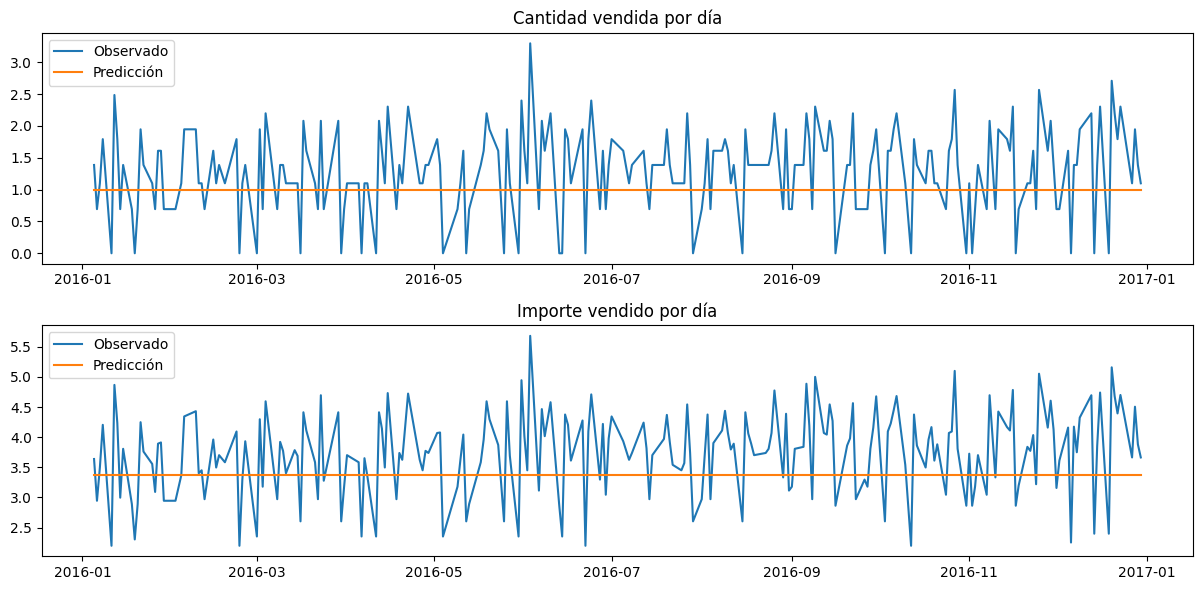

In [ ]:
# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_Cremas_Cantidad['Fecha'][data_Cremas_Cantidad['Fecha'] >= fecha_inicio_prueba], test_Cantidad, label='Observado')
plt.plot(data_Cremas_Cantidad['Fecha'][data_Cremas_Cantidad['Fecha'] >= fecha_inicio_prueba], predictions_Cantidad, label='Predicción')
plt.title('Cantidad vendida por día')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data_Cremas_Importe['Fecha'][data_Cremas_Importe['Fecha'] >= fecha_inicio_prueba], test_Importe, label='Observado')
plt.plot(data_Cremas_Importe['Fecha'][data_Cremas_Importe['Fecha'] >= fecha_inicio_prueba], predictions_Importe, label='Predicción')
plt.title('Importe vendido por día')
plt.legend()

plt.tight_layout()
plt.show()


Por día es difícil que haga predicciones, No funciona, vamos a ver si funciona por semana o mes

### PDARIMA - Semana

In [ ]:
# Establece 'Fecha' como el índice
data_Cremas.set_index('Fecha', inplace=True)

# Agrupa por semana y suma 'Cantidad' y 'Importe' por semana
data_Cremas_S = data_Cremas.resample('W').agg({'Cantidad': 'sum', 'Importe': 'sum'})

# Reinicia el índice si deseas tener 'Fecha' como una columna nuevamente
data_Cremas_S.reset_index(inplace=True)

data_Cremas_S.head()

,Fecha,Cantidad,Importe
0,2014-01-05,3,32.4
1,2014-01-12,20,219.7
2,2014-01-19,16,183.5
3,2014-01-26,16,161.2
4,2014-02-02,9,90.1


In [ ]:
# Aplicar la transformación logarítmica a las columnas 'Cantidad' e 'Importe'
data_Cremas_S['Cantidad_log'] = np.log1p(data_Cremas_S['Cantidad'])
data_Cremas_S['Importe_log'] = np.log1p(data_Cremas_S['Importe'])

data_Cremas_S

,Fecha,Cantidad,Importe,Cantidad_log,Importe_log
0,2014-01-05,3,32.4,1.386294,3.508556
1,2014-01-12,20,219.7,3.044522,5.396804
2,2014-01-19,16,183.5,2.833213,5.217649
3,2014-01-26,16,161.2,2.833213,5.088830
4,2014-02-02,9,90.1,2.302585,4.511958
...,...,...,...,...,...
152,2016-12-04,21,286.5,3.091042,5.661223
153,2016-12-11,21,256.5,3.091042,5.551020
154,2016-12-18,24,282.0,3.218876,5.645447
155,2016-12-25,41,484.0,3.737670,6.184149


Dividir en train y test

In [ ]:
# Fechas de inicio y fin para los conjuntos de entrenamiento y prueba
fecha_inicio_entrenamiento = '2014-01-01'
fecha_fin_entrenamiento = '2015-12-31'
fecha_inicio_prueba = '2016-01-01'
fecha_fin_prueba = '2016-12-31'

# Filtra los datos para obtener conjuntos de entrenamiento y prueba
train_Cantidad = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_S['Fecha'] <= fecha_fin_entrenamiento)]['Cantidad_log']
test_Cantidad = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_S['Fecha'] <= fecha_fin_prueba)]['Cantidad_log']

train_Importe = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_S['Fecha'] <= fecha_fin_entrenamiento)]['Importe_log']
test_Importe = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_S['Fecha'] <= fecha_fin_prueba)]['Importe_log']

Ajustar el modelo

In [ ]:
from pmdarima.arima import auto_arima

# Ajustar el modelo ARIMA automáticamente con pmdarima
model_C = auto_arima(data_Cremas_S['Cantidad_log'], trace=True)

best_order = model_C.order
print(f"Mejores parámetros del modelo ARIMA: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=146.631, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=249.616, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=210.969, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=146.431, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=247.667, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=146.585, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=145.715, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=156.028, Time=1.60 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=144.492, Time=0.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=145.695, Time=1.47 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=146.480, Time=0.72 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=146.656, Time=1.79 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=144.377, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=145.865, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=145.7

In [ ]:
# Ajuste del modelo ARIMA para Cantidad (ajusta los parámetros adecuados)
p = 0
d = 1
q = 3
model_Cantidad = ARIMA(train_Cantidad, order=(p, d, q))
model_Cantidad_fit = model_Cantidad.fit()

In [ ]:
# Ajustar el modelo ARIMA automáticamente con pmdarima
model_I = auto_arima(data_Cremas_S['Importe_log'], trace=True)

# Obtener los parámetros del mejor modelo
best_order = model_I.order
print(f"Mejores parámetros del modelo ARIMA: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=167.918, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=270.356, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=232.935, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=168.695, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=268.426, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=166.055, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=168.740, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=203.080, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=167.980, Time=0.77 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=191.644, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=170.049, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=166.643, Time=0.25 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.535 seconds
Mejores parámetros del modelo ARIMA: (2

In [ ]:
# Ajuste del modelo ARIMA para Importe (ajusta los parámetros adecuados)
p = 2  #
d = 1  # Ya que los datos son estacionarios
q = 1  # Último lag significativo
model_Importe = ARIMA(train_Importe, order=(p, d, q))
model_Importe_fit = model_Importe.fit()

In [ ]:
# Realiza predicciones para el año 2016
predictions_Cantidad = model_Cantidad_fit.forecast(steps=len(test_Cantidad))
predictions_Importe = model_Importe_fit.forecast(steps=len(test_Importe))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evalúa el modelo (por ejemplo, MSE o MAE)
mse_Cantidad = mean_squared_error(test_Cantidad, predictions_Cantidad)
mae_Cantidad = mean_absolute_error(test_Cantidad, predictions_Cantidad)
mse_Importe = mean_squared_error(test_Importe, predictions_Importe)
mae_Importe = mean_absolute_error(test_Importe, predictions_Importe)

print(f'MSE Cantidad: {mse_Cantidad}')
print(f'MAE Cantidad: {mae_Cantidad}')
print(f'MSE Importe: {mse_Importe}')
print(f'MAE Importe: {mae_Importe}')

MSE Cantidad: 0.23900272891508006
MAE Cantidad: 0.4025191709051978
MSE Importe: 0.3641937987032168
MAE Importe: 0.5100012760105272


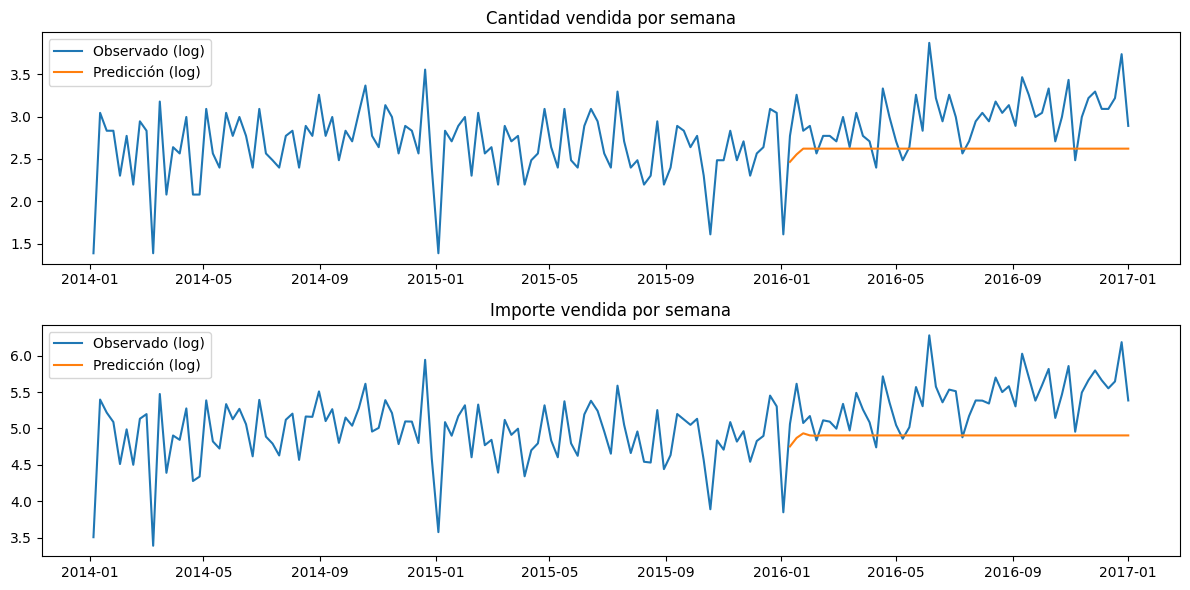

In [ ]:
# Visualización de las predicciones para "Cantidad"
plt.figure(figsize=(12, 6))


# Establece el rango de fechas que deseas mostrar
inicio_predicciones = data_Cremas_S['Fecha'][-len(predictions_Cantidad):]
plt.subplot(2, 1, 1)
plt.plot(data_Cremas_S['Fecha'], data_Cremas_S['Cantidad_log'], label='Observado (log)')
plt.plot(inicio_predicciones, predictions_Cantidad, label='Predicción (log)')
plt.title('Cantidad vendida por semana')
plt.legend()

# Visualización de las predicciones para "Importe"
inicio_predicciones = data_Cremas_S['Fecha'][-len(predictions_Importe):]
plt.subplot(2, 1, 2)
plt.plot(data_Cremas_S['Fecha'], data_Cremas_S['Importe_log'], label='Observado (log)')
plt.plot(inicio_predicciones, predictions_Importe, label='Predicción (log)')
plt.title('Importe vendida por semana')
plt.legend()

plt.tight_layout()
plt.show()

Por semana sólo toma el primer pico y después de eso ya no puede predecir

### PMDARIMA - Mes

In [ ]:
# Agrupa por semana y suma 'Cantidad' y 'Importe' por mes
data_Cremas_M = data_Cremas.resample('M').agg({'Cantidad': 'sum', 'Importe': 'sum'})

# Reinicia el índice si deseas tener 'Fecha' como una columna nuevamente
data_Cremas_M.reset_index(inplace=True)

data_Cremas_M.head()

,Fecha,Cantidad,Importe
0,2014-01-31,64,686.9
1,2014-02-28,57,583.3
2,2014-03-31,48,499.6
3,2014-04-30,61,638.6
4,2014-05-31,60,634.6


In [ ]:
# Aplicar la transformación logarítmica a las columnas 'Cantidad' e 'Importe'
data_Cremas_M['Cantidad_log'] = np.log1p(data_Cremas_M['Cantidad'])
data_Cremas_M['Importe_log'] = np.log1p(data_Cremas_M['Importe'])

data_Cremas_M.head()

,Fecha,Cantidad,Importe,Cantidad_log,Importe_log
0,2014-01-31,64,686.9,4.174387,6.533643
1,2014-02-28,57,583.3,4.060443,6.370415
2,2014-03-31,48,499.6,3.891820,6.215807
3,2014-04-30,61,638.6,4.127134,6.460843
4,2014-05-31,60,634.6,4.110874,6.454569


Dividir en train y test

In [ ]:
# Fechas de inicio y fin para los conjuntos de entrenamiento y prueba
fecha_inicio_entrenamiento = '2014-01-01'
fecha_fin_entrenamiento = '2015-12-31'
fecha_inicio_prueba = '2016-01-01'
fecha_fin_prueba = '2016-12-31'

# Filtra los datos para obtener conjuntos de entrenamiento y prueba
train_Cantidad = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_M['Fecha'] <= fecha_fin_entrenamiento)]['Cantidad_log']
test_Cantidad = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_M['Fecha'] <= fecha_fin_prueba)]['Cantidad_log']

train_Importe = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_M['Fecha'] <= fecha_fin_entrenamiento)]['Importe_log']
test_Importe = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_M['Fecha'] <= fecha_fin_prueba)]['Importe_log']

Ajustar el modelo

In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from itertools import product

In [ ]:
from pmdarima.arima import auto_arima

# Ajustar el modelo ARIMA automáticamente con pmdarima
model_C = auto_arima(data_Cremas_M['Cantidad_log'], trace=True)

best_order = model_C.order
print(f"Mejores parámetros del modelo ARIMA: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16.698, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4.273, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12.909, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15.854, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6.114, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12.930, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15.503, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-12.087, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-16.586, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14.657, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13.636, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-15.361, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-18.368, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13.821, Ti

In [ ]:
# Ajuste del modelo ARIMA para Cantidad (ajusta los parámetros adecuados)
p = 2
d = 1
q = 2
model_Cantidad = ARIMA(train_Cantidad, order=(p, d, q))
model_Cantidad_fit = model_Cantidad.fit()

In [ ]:
# Ajustar el modelo ARIMA automáticamente con pmdarima
model_I = auto_arima(data_Cremas_M['Importe_log'], trace=True)

# Obtener los parámetros del mejor modelo
best_order = model_I.order
print(f"Mejores parámetros del modelo ARIMA: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14.116, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2.224, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9.414, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12.184, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3.988, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9.313, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13.005, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-14.931, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-11.407, Time=0.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-10.589, Time=0.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-11.767, Time=1.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-14.426, Time=0.97 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-9.684, Time=0.50 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-11.981, Time=0.89 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=

In [ ]:
# Ajuste del modelo ARIMA para Importe (ajusta los parámetros adecuados)
p = 3  #
d = 1  # Ya que los datos son estacionarios
q = 2  # Último lag significativo
model_Importe = ARIMA(train_Importe, order=(p, d, q))
model_Importe_fit = model_Importe.fit()

In [ ]:
# Realiza predicciones para el año 2016
predictions_Cantidad = model_Cantidad_fit.forecast(steps=len(test_Cantidad))
predictions_Importe = model_Importe_fit.forecast(steps=len(test_Importe))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evalúa el modelo (por ejemplo, MSE o MAE)
mse_Cantidad = mean_squared_error(test_Cantidad, predictions_Cantidad)
mae_Cantidad = mean_absolute_error(test_Cantidad, predictions_Cantidad)
mse_Importe = mean_squared_error(test_Importe, predictions_Importe)
mae_Importe = mean_absolute_error(test_Importe, predictions_Importe)

print(f'MSE Cantidad: {mse_Cantidad}')
print(f'MAE Cantidad: {mae_Cantidad}')
print(f'MSE Importe: {mse_Importe}')
print(f'MAE Importe: {mae_Importe}')

MSE Cantidad: 0.18752417581200923
MAE Cantidad: 0.3922824570081331
MSE Importe: 0.2669702153117213
MAE Importe: 0.4724173823407336


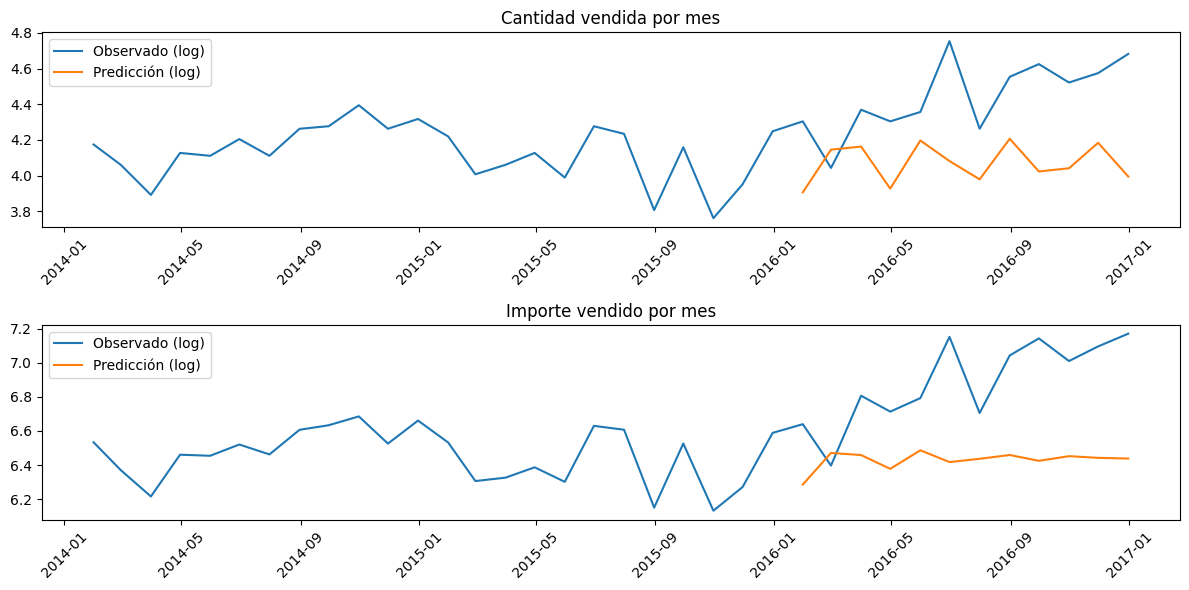

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que 'Fecha' en data_Cremas_mes es del tipo datetime
# Si no lo es, conviértela primero con pd.to_datetime

# Establece el rango de fechas que deseas mostrar
inicio_predicciones = data_Cremas_M['Fecha'][-len(predictions_Cantidad):]

# Visualización de las predicciones para "Cantidad"
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)

# Crea el gráfico de líneas
plt.plot(data_Cremas_M['Fecha'], data_Cremas_M['Cantidad_log'], label='Observado (log)')
plt.plot(inicio_predicciones, predictions_Cantidad, label='Predicción (log)')
plt.title('Cantidad vendida por mes')
plt.legend()

# Rotar las etiquetas del eje x para que las fechas se muestren correctamente
plt.xticks(rotation=45)

# Visualización de las predicciones para "Importe"
plt.subplot(2, 1, 2)

# Crea el gráfico de líneas
plt.plot(data_Cremas_M['Fecha'], data_Cremas_M['Importe_log'], label='Observado (log)')
plt.plot(inicio_predicciones, predictions_Importe, label='Predicción (log)')
plt.title('Importe vendido por mes')
plt.legend()

# Rotar las etiquetas del eje x para que las fechas se muestren correctamente
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Venta de resultados

Como científico de Datos que trabaja para este Supermercado debo de hacer que los datos nos digan información relevante para tomar decisiones de negocio y que se refleje en la buena administración y en las ganancias.

A mi se me piden analizar el Sector de Cremería para predecir en qué fechas se debe de pedir más cantidad de inventario de estos productos.

Después de realizar un análisis se llegan a las siguientes conclusiones:

*  La predicción logra capturar algunos meses en donde sube la cantidad vendida de los productos del Sector CREMAS.

*  Para la serie de tiempo de Cantidad podemos comprobar que hay fechas en donde sube la demanda de estos productos por ejemplo en Septiembre donde uno sabe que por las festividades mexicanas se ocupa cremas en varios platillos la predicción es buena porque si muestra un pico para ese mes.

*  Además nos podemos dar cuenta de en qué otros meses la demanda va a subir y no sabíamos estas tendencias, así podemos predecir en qué meses se debe de tener más inventario

*  Hay un periodo en que podemos también predicir en qué meses baja la demanda para así recomendar no tener tanto inventario y evitar que se queden productos o caduquen.



## Triple Exponential Smoothing

El Triple Exponential Smoothing, también conocido como Holt-Winters Triple Exponential Smoothing, es una técnica de pronóstico utilizada en series de tiempo para predecir valores futuros en función de patrones históricos. Se utiliza en casos en los que los datos muestran tendencias, estacionalidad y una componente de error aleatorio.

In [ ]:
import pandas as pd
import numpy as np

### Por Semana

In [ ]:
data_Cremas_S.head()

,Fecha,Cantidad,Importe,Cantidad_log,Importe_log
0,2014-01-05,3,32.4,1.386294,3.508556
1,2014-01-12,20,219.7,3.044522,5.396804
2,2014-01-19,16,183.5,2.833213,5.217649
3,2014-01-26,16,161.2,2.833213,5.088830
4,2014-02-02,9,90.1,2.302585,4.511958


In [ ]:
# Fechas de inicio y fin para los conjuntos de entrenamiento y prueba
fecha_inicio_entrenamiento = '2014-01-01'
fecha_fin_entrenamiento = '2015-12-31'
fecha_inicio_prueba = '2016-01-01'
fecha_fin_prueba = '2016-12-31'

# Filtra los datos para obtener conjuntos de entrenamiento y prueba
train_Cantidad = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_S['Fecha'] <= fecha_fin_entrenamiento)]['Cantidad_log']
test_Cantidad = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_S['Fecha'] <= fecha_fin_prueba)]['Cantidad_log']

train_Importe = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_S['Fecha'] <= fecha_fin_entrenamiento)]['Importe_log']
test_Importe = data_Cremas_S[(data_Cremas_S['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_S['Fecha'] <= fecha_fin_prueba)]['Importe_log']

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajustar el modelo TES aditivo a los datos de entrenamiento para 'Cantidad'
model_cantidad = ExponentialSmoothing(train_Cantidad, trend="add", seasonal="add", seasonal_periods=52)
model_fit_cantidad = model_cantidad.fit()

# Hacer predicciones en el conjunto de prueba para 'Cantidad'
predictions_cantidad = model_fit_cantidad.forecast(len(test_Cantidad))

# Calcular el MSE y MAE para 'Cantidad'
mse_cantidad = mean_squared_error(test_Cantidad, predictions_cantidad)
mae_cantidad = mean_absolute_error(test_Cantidad, predictions_cantidad)

print("MSE para Cantidad:", mse_cantidad)
print("MAE para Cantidad:", mae_cantidad)

MSE para Cantidad: 0.6847481679517559
MAE para Cantidad: 0.7286061224264243


In [ ]:
# Ajustar el modelo TES aditivo a los datos de entrenamiento para 'Importe'
model_importe = ExponentialSmoothing(train_Importe, trend="add", seasonal="add", seasonal_periods=52)
model_fit_importe = model_importe.fit()

# Hacer predicciones en el conjunto de prueba para 'Importe'
predictions_importe = model_fit_importe.forecast(len(test_Importe))

# Calcular el MSE y MAE para 'Importe'
mse_importe = mean_squared_error(test_Importe, predictions_importe)
mae_importe = mean_absolute_error(test_Importe, predictions_importe)

print("MSE para Importe:", mse_importe)
print("MAE para Importe:", mae_importe)

MSE para Importe: 0.48957191746831064
MAE para Importe: 0.5945948489145612


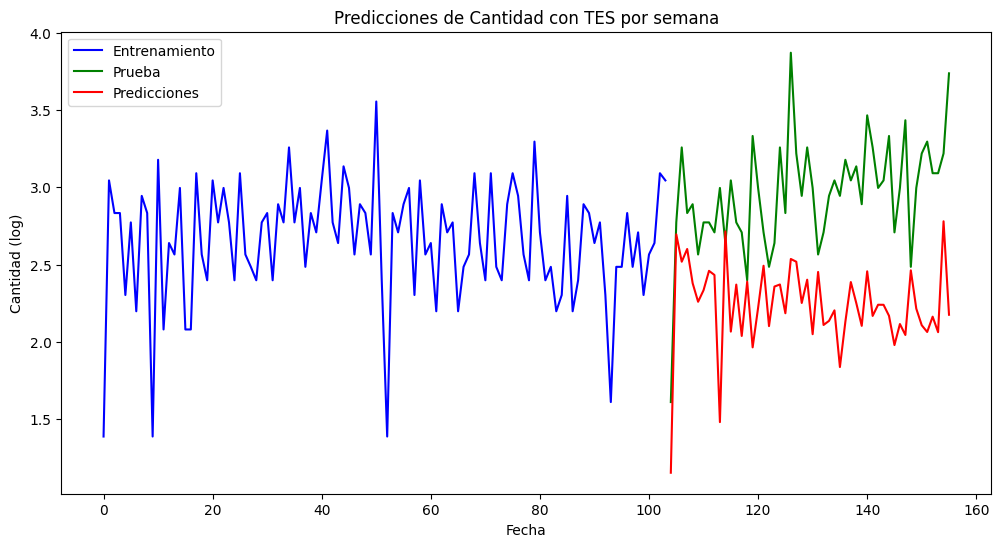

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para 'Cantidad'
plt.figure(figsize=(12, 6))
plt.plot(train_Cantidad.index, train_Cantidad, label='Entrenamiento', color='blue')
plt.plot(test_Cantidad.index, test_Cantidad, label='Prueba', color='green')
plt.plot(test_Cantidad.index, predictions_cantidad, label='Predicciones', color='red')
plt.title('Predicciones de Cantidad con TES por semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad (log)')
plt.legend()
plt.show()

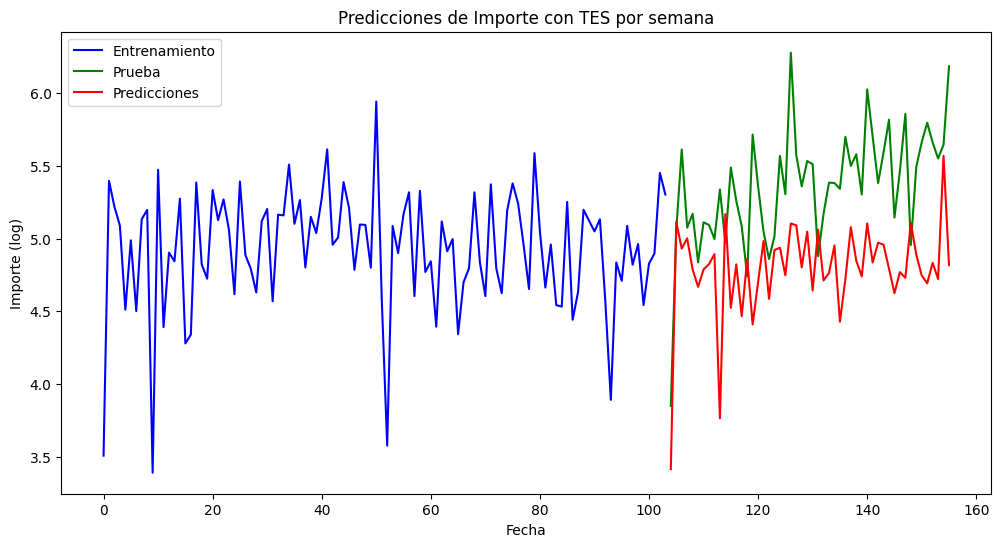

In [ ]:
# Gráfico para 'Importe'
plt.figure(figsize=(12, 6))
plt.plot(train_Importe.index, train_Importe, label='Entrenamiento', color='blue')
plt.plot(test_Importe.index, test_Importe, label='Prueba', color='green')
plt.plot(test_Importe.index, predictions_importe, label='Predicciones', color='red')
plt.title('Predicciones de Importe con TES por semana')
plt.xlabel('Fecha')
plt.ylabel('Importe (log)')
plt.legend()
plt.show()

### Por Mes

In [ ]:
data_Cremas_M.head()

,Fecha,Cantidad,Importe,Cantidad_log,Importe_log
0,2014-01-31,64,686.9,4.174387,6.533643
1,2014-02-28,57,583.3,4.060443,6.370415
2,2014-03-31,48,499.6,3.891820,6.215807
3,2014-04-30,61,638.6,4.127134,6.460843
4,2014-05-31,60,634.6,4.110874,6.454569


In [ ]:
# Fechas de inicio y fin para los conjuntos de entrenamiento y prueba
fecha_inicio_entrenamiento = '2014-01-01'
fecha_fin_entrenamiento = '2015-12-31'
fecha_inicio_prueba = '2016-01-01'
fecha_fin_prueba = '2016-12-31'

# Filtra los datos para obtener conjuntos de entrenamiento y prueba
train_Cantidad = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_M['Fecha'] <= fecha_fin_entrenamiento)]['Cantidad_log']
test_Cantidad = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_M['Fecha'] <= fecha_fin_prueba)]['Cantidad_log']

train_Importe = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_entrenamiento) & (data_Cremas_M['Fecha'] <= fecha_fin_entrenamiento)]['Importe_log']
test_Importe = data_Cremas_M[(data_Cremas_M['Fecha'] >= fecha_inicio_prueba) & (data_Cremas_M['Fecha'] <= fecha_fin_prueba)]['Importe_log']

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajustar el modelo TES aditivo a los datos de entrenamiento para 'Cantidad'
model_cantidad = ExponentialSmoothing(train_Cantidad, trend="add", seasonal="add", seasonal_periods=12)
model_fit_cantidad = model_cantidad.fit()

# Hacer predicciones en el conjunto de prueba para 'Cantidad'
predictions_cantidad = model_fit_cantidad.forecast(len(test_Cantidad))

# Calcular el MSE y MAE para 'Cantidad'
mse_cantidad = mean_squared_error(test_Cantidad, predictions_cantidad)
mae_cantidad = mean_absolute_error(test_Cantidad, predictions_cantidad)

print("MSE para Cantidad:", mse_cantidad)
print("MAE para Cantidad:", mae_cantidad)

MSE para Cantidad: 0.2678062006775454
MAE para Cantidad: 0.4886134741425506


In [ ]:
# Ajustar el modelo TES aditivo a los datos de entrenamiento para 'Importe'
model_importe = ExponentialSmoothing(train_Importe, trend="add", seasonal="add", seasonal_periods=12)
model_fit_importe = model_importe.fit()

# Hacer predicciones en el conjunto de prueba para 'Importe'
predictions_importe = model_fit_importe.forecast(len(test_Importe))

# Calcular el MSE y MAE para 'Importe'
mse_importe = mean_squared_error(test_Importe, predictions_importe)
mae_importe = mean_absolute_error(test_Importe, predictions_importe)

print("MSE para Importe:", mse_importe)
print("MAE para Importe:", mae_importe)

MSE para Importe: 0.4142297018842458
MAE para Importe: 0.6070202789897808


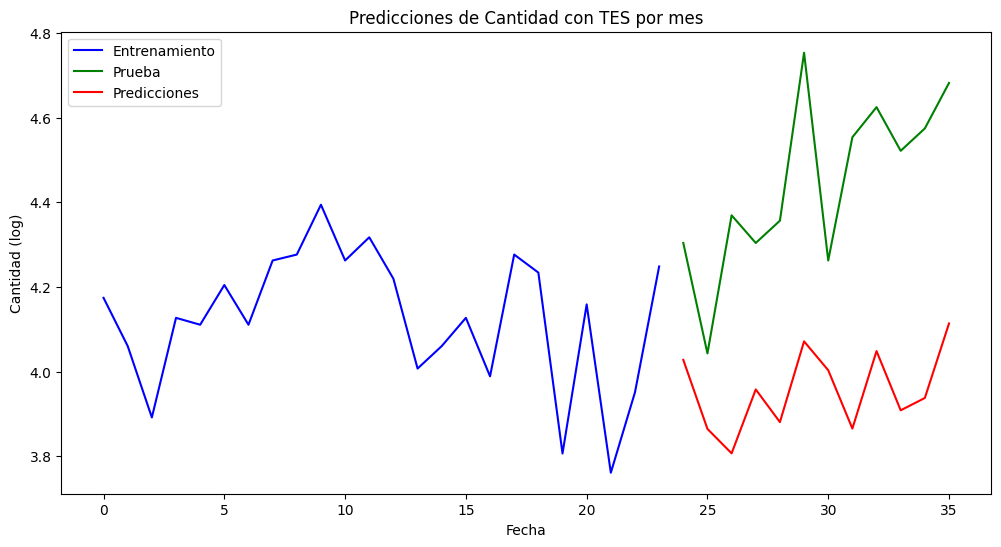

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para 'Cantidad'
plt.figure(figsize=(12, 6))
plt.plot(train_Cantidad.index, train_Cantidad, label='Entrenamiento', color='blue')
plt.plot(test_Cantidad.index, test_Cantidad, label='Prueba', color='green')
plt.plot(test_Cantidad.index, predictions_cantidad, label='Predicciones', color='red')
plt.title('Predicciones de Cantidad con TES por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad (log)')
plt.legend()
plt.show()

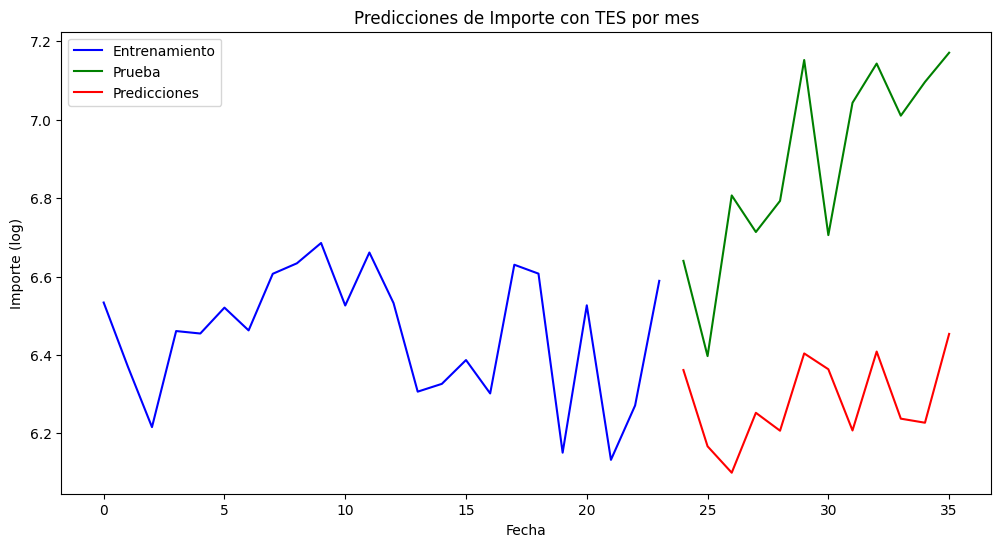

In [ ]:
# Gráfico para 'Importe'
plt.figure(figsize=(12, 6))
plt.plot(train_Importe.index, train_Importe, label='Entrenamiento', color='blue')
plt.plot(test_Importe.index, test_Importe, label='Prueba', color='green')
plt.plot(test_Importe.index, predictions_importe, label='Predicciones', color='red')
plt.title('Predicciones de Importe con TES por mes')
plt.xlabel('Fecha')
plt.ylabel('Importe (log)')
plt.legend()
plt.show()

### Conclusión

Con TES también podemos ver los picos en donde sube la Cantidad de productos que se venden y por lo tanto tambien el Importe

TES resultó mucho mejor que ARIMA porque se ven más claras y marcadas las tendencias.

En conclusión vamos a poder predecir en que fechas hay más demanda y en cuáles no de los productos del Sector CREMAS para poder hacer pronóstico de ventas (Importe) y gestión de inventario (Cantidad) con la ayuda de estos datos históricos.